In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [6]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [7]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images: ', num_cats_tr)
print('total training dog images: ', num_dogs_tr)

print('total validation cat images: ', num_cats_val)
print('total validation cat images: ', num_dogs_val)

print('-----------------------------')
print('total training images: ', total_train)
print('total validation images: ', total_val)

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation cat images:  500
-----------------------------
total training images:  2000
total validation images:  1000


In [10]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [11]:
# Generator for training data
train_image_generator = ImageDataGenerator(rescale=1./255)

# Generator for validation data
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [12]:
train_data_gen = train_image_generator.flow_from_directory(
batch_size=batch_size,
directory=train_dir,
shuffle=True,
target_size=(IMG_HEIGHT, IMG_WIDTH),
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(
batch_size=batch_size,
directory=validation_dir,
target_size=(IMG_HEIGHT, IMG_WIDTH),
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [14]:
sample_training_images, _ = next(train_data_gen)

In [15]:
# This function will plot images in the form a grid with 1 row and
# 5 columns where images are placed in each column.

def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

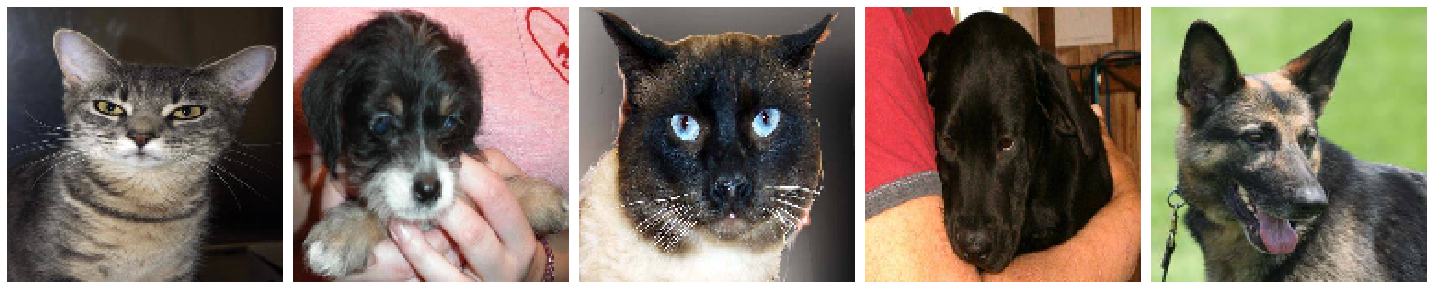

In [16]:
plotImages(sample_training_images[:5])

In [25]:
# Creating the model

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

In [29]:
# Compiling the model

model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)       

In [31]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 16s 1s/step - loss: 0.9616 - accuracy: 0.5091 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/15
15/15 [==============================] - 16s 1s/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5078
Epoch 3/15
15/15 [==============================] - 16s 1s/step - loss: 0.6932 - accuracy: 0.5176 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 4/15
15/15 [==============================] - 15s 1s/step - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6931 - val_accuracy: 0.5614
Epoch 5/15
15/15 [==============================] - 15s 1s/step - loss: 0.6931 - accuracy: 0.5614 - val_loss: 0.6931 - val_accuracy: 0.5725
Epoch 6/15
15/15 [==============================] - 15s 1s/step - loss: 0.6931 - accuracy: 0.5577 - val_loss: 0.6931 - val_accuracy: 0.5312
Epoch 7/15
15/15 [==============================] - 16s 1s/step - loss: 0.6931 - accuracy: 0.5379 - val_loss: 0.6931 - val_accuracy: 0.5335
Epoch 8/15
15/15 [==

KeyboardInterrupt: 

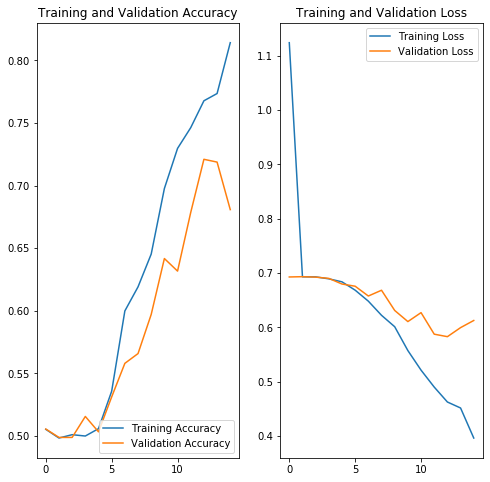

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
